In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

Data Generation
===

In [2]:
np.random.seed(10)
P, Q = (np.random.rand(i, 2) for i in (4, 5))
P_big, Q_big = (np.random.rand(i, 80) for i in (100, 120))

print(P, "\n\n", Q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [11]:
def naive(P, Q):
    """
    A naive solution for finding pairvise distances between poins in P and Q
    
    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)
    Returns:
        D: numpy array of shape=(p*q,)
        
    >>> naive(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))
    array([[2.82842712, 5.65685425]])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement a naive solution
    # ***************************************************
    D = np.zeros((len(P), len(Q)))
    for i, p in enumerate(P):
        for j, q in enumerate(Q):
            D[i, j] = np.sqrt((p[0] - q[0]) ** 2 + (p[1] - q[1]) ** 2)
    return D

test(naive)

✅ Your `naive` passed 1 tests.


### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [12]:
rows, cols = np.indices((P.shape[0], Q.shape[0]))
print(rows, end="\n\n")
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [16]:
P[rows.ravel()]

array([[0.77132064, 0.02075195],
       [0.77132064, 0.02075195],
       [0.77132064, 0.02075195],
       [0.77132064, 0.02075195],
       [0.77132064, 0.02075195],
       [0.63364823, 0.74880388],
       [0.63364823, 0.74880388],
       [0.63364823, 0.74880388],
       [0.63364823, 0.74880388],
       [0.63364823, 0.74880388],
       [0.49850701, 0.22479665],
       [0.49850701, 0.22479665],
       [0.49850701, 0.22479665],
       [0.49850701, 0.22479665],
       [0.49850701, 0.22479665],
       [0.19806286, 0.76053071],
       [0.19806286, 0.76053071],
       [0.19806286, 0.76053071],
       [0.19806286, 0.76053071],
       [0.19806286, 0.76053071]])

In [22]:
print(P[rows.ravel()], end="\n\n")
print(Q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [50]:
P[rows.ravel()] - Q[cols.ravel()]

array([[ 0.60220981, -0.06758786],
       [ 0.08596082, -0.9326414 ],
       [ 0.76737238, -0.49144031],
       [-0.04130032, -0.59177412],
       [ 0.04956533, -0.27112412],
       [ 0.4645374 ,  0.66046407],
       [-0.05171158, -0.20458946],
       [ 0.62969997,  0.23661162],
       [-0.17897273,  0.13627782],
       [-0.08810708,  0.45692781],
       [ 0.32939618,  0.13645683],
       [-0.18685281, -0.7285967 ],
       [ 0.49455875, -0.28739562],
       [-0.31411395, -0.38772942],
       [-0.22324831, -0.06707942],
       [ 0.02895203,  0.6721909 ],
       [-0.48729695, -0.19286263],
       [ 0.1941146 ,  0.24833845],
       [-0.6145581 ,  0.14800465],
       [-0.52369245,  0.46865464]])

In [73]:
def with_indices(P, Q):
    """
    An optimized solution using matching indices
    
    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)
    Returns:
        D: numpy array of shape=(p*q,)
        
    >>> with_indices(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))
    array([[2.82842712, 5.65685425]])
    """
    rows, cols = np.indices((P.shape[0], Q.shape[0]))
    differences = P[rows.ravel()] - Q[cols.ravel()]
    squared_differences = differences ** 2
    distances = np.sqrt(squared_differences.sum(axis=1))
    return distances.reshape(1, -1)

test(with_indices)

✅ Your `with_indices` passed 1 tests.


### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [74]:
from scipy.spatial.distance import cdist


def scipy_version(P, Q):
    return cdist(P, Q)

### Numpy Magic

In [75]:
def tensor_broadcasting(P, Q):
    return np.sqrt(np.sum((P[:, np.newaxis, :] - Q[np.newaxis, :, :]) ** 2, axis=2))

# Compare methods

In [78]:
methods = [
    naive,
    # naive_2,
    with_indices,
    # with_indices_2,
    scipy_version,
    tensor_broadcasting,
]
timers = []
for f in methods:
    r = %timeit -o f(P_big, Q_big)
    timers.append(r)

28.4 ms ± 929 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
8.9 ms ± 245 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
532 µs ± 19.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.17 ms ± 167 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


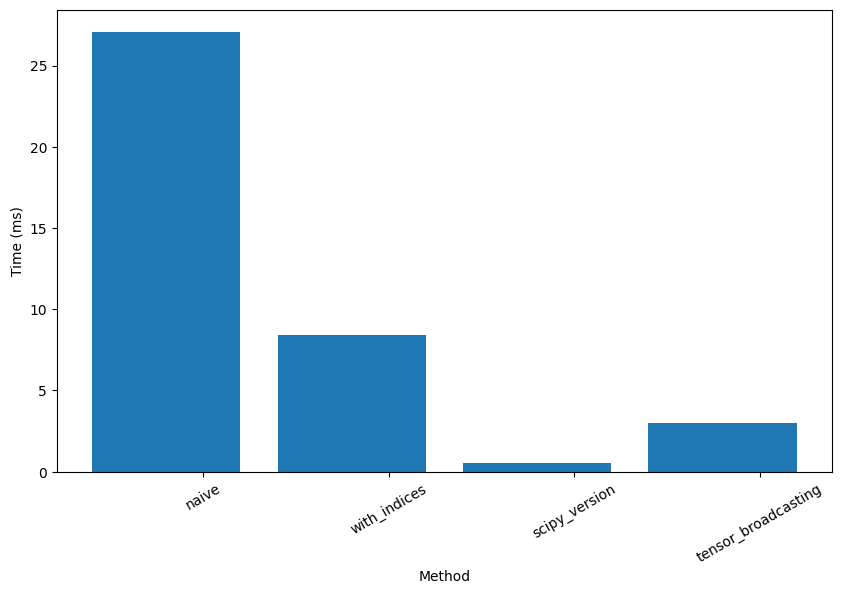

In [79]:
plt.figure(figsize=(10, 6))
plt.bar(
    np.arange(len(methods)), [r.best * 1000 for r in timers], log=False
)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods)) + 0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel("Method")
plt.ylabel("Time (ms)")
plt.show()